In [1]:
from laserhockey_main import main
#from debug_env_main import main
import pylab as plt
import numpy as np
#import laserhockey.hockey_env as h_env

In [2]:
def running_mean(x, N):
    return np.convolve(x, np.ones(N)/N, mode='valid')

In [3]:
env, m3ddpg = main()

In [4]:
#actions are not normed, noise level has to be higher in that case, or just norm the actions, use batch norm?

In [5]:
rewards = m3ddpg.train(1000000)

100%|██████████████████████████████████████████████████████████████████████| 1100000/1100000 [3:42:51<00:00, 82.26it/s]


In [10]:
PREFIX = "MADDPG"
DIR_PATH = "./models/"
NUM_ACTORS = 2
#ITERATIONS = m3ddpg.total_iterations
ITERATIONS = 2500000
#m3ddpg.total_iterations = ITERATIONS

In [11]:
m3ddpg.save_status(dir_path=DIR_PATH, prefix=PREFIX)

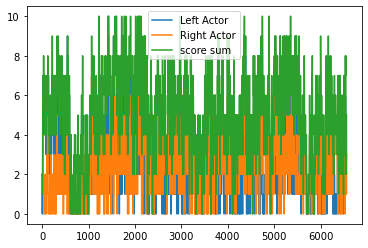

In [6]:
plt.close()
plt.plot(running_mean(rewards[:,0],10), label="Left Actor")
plt.plot(running_mean(rewards[:,1],10), label="Right Actor")
plt.plot(running_mean(np.array(rewards).sum(axis=1),10), label="score sum")
plt.legend()

In [5]:
actor_file_names, critic_file_names, actor_optimizer_file_names, critic_optimizer_file_names = [], [], [], []
for i in range(NUM_ACTORS):
    actor_file_names.append(f'{PREFIX}_actor{i}_{ITERATIONS}its.pt')
    critic_file_names.append(f'{PREFIX}_critic{i}_{ITERATIONS}its.pt')
    actor_optimizer_file_names.append(f'{PREFIX}_actor{i}_optimizer_{ITERATIONS}its.pt')
    critic_optimizer_file_names.append(f'{PREFIX}_critic{i}_optimizer_{ITERATIONS}its.pt')
    

m3ddpg.load_status(dir_path=DIR_PATH, 
                   actor_file_names=actor_file_names,
                  critic_file_names=critic_file_names,
                  actor_optimizer_file_names=actor_optimizer_file_names,
                  critic_optimizer_file_names=critic_optimizer_file_names)

In [7]:
actor_left = m3ddpg.get_policy(0)
actor_right = m3ddpg.get_policy(1)

In [8]:
for _ in range(10):
    state, obs = env.reset()
    for _ in range(250):
        action1 = actor_left(obs[0])
        action2 = actor_right(obs[1])
        state, obs, r, d, info = env.step(np.hstack([action1,action2]))
        env.render()
        if d: break
env.close()